In [11]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [12]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
def sigma(x):
    return 1./(1. + np.exp(-x))

In [18]:
class RBM:
    def __init__(self, input_size=784, hidden_size=500):
        xavier_range = np.sqrt(6.0/(input_size + hidden_size))
#         self.W = np.random.uniform(-xavier_range, xavier_range, (input_size, hidden_size))
        self.W = np.random.rand(input_size, hidden_size) * 0.5
        self.b = np.zeros((1,hidden_size))
        self.a = np.zeros((1,input_size))
        self.input_size = input_size
        self.hidden_size = hidden_size
    
    def front_propagation(self, input_visible):
        activated_hidden = sigma(np.matmul(input_visible, self.W) + self.b)
        rand_array = np.random.rand(activated_hidden.shape[0], activated_hidden.shape[1])
        h = (activated_hidden > rand_array).astype('int')
        return h
    
    def back_propagation(self, input_hidden):
        return sigma(np.matmul(input_hidden, np.transpose(self.W)) + self.a)
        
    
    def train(self, X, learning_rate=0.001, generating=False):
        number_of_data = X.shape[0]
        h = self.front_propagation(X)
        X1 = self.back_propagation(h)
        h1 = self.front_propagation(X1)
        
    
        dW = np.matmul(np.transpose(X), h) - np.matmul(np.transpose(X1), h1)
        db = np.sum(h - h1, axis=0, keepdims=True)
        da = np.sum(X - X1, axis=0, keepdims=True)
        
        self.W += learning_rate * dW / number_of_data
        self.b += learning_rate * db / number_of_data
        self.a += learning_rate * da / number_of_data

        error = np.mean(np.sum((X - X1) ** 2, axis=1))
        
        return error
        
        
    def generate_images(self, number_of_images=20, n_step=200):
        hidden = np.round(np.random.rand(number_of_images, self.hidden_size))
        for i in range(n_step):
            visible = self.back_propagation(hidden)
            hidden = self.front_propagation(visible)
        return visible

In [19]:
model = RBM()

In [20]:
BATCH_SIZE = 100
TRAINING_EPOCHS = 50

In [21]:
for epoch in range(TRAINING_EPOCHS):
    total_batch = int(mnist.train.num_examples / BATCH_SIZE)
    total_error = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        total_error += model.train(batch_xs)/total_batch
    print('Epoch: ' + str((epoch + 1)) + ': ' + str(total_error) )

print('Learning Finished!')


Epoch: 1: 360.82554643
Epoch: 2: 42.3772340063
Epoch: 3: 35.3694948081
Epoch: 4: 31.5298544482
Epoch: 5: 28.9137653371
Epoch: 6: 27.0542259763
Epoch: 7: 25.6145984937
Epoch: 8: 24.4604055242
Epoch: 9: 23.5326096744
Epoch: 10: 22.7328273798
Epoch: 11: 22.0465214327
Epoch: 12: 21.4361505033
Epoch: 13: 20.8957831541
Epoch: 14: 20.4523427557
Epoch: 15: 20.0069077559
Epoch: 16: 19.6144424356
Epoch: 17: 19.2528857749
Epoch: 18: 18.9210949291
Epoch: 19: 18.6215143409
Epoch: 20: 18.3383196442
Epoch: 21: 18.0732679082
Epoch: 22: 17.8419941964
Epoch: 23: 17.5922293953
Epoch: 24: 17.3766952908
Epoch: 25: 17.1770629666
Epoch: 26: 16.9831617015
Epoch: 27: 16.8113870856
Epoch: 28: 16.6429398
Epoch: 29: 16.4631357433
Epoch: 30: 16.3185497383
Epoch: 31: 16.1745268496
Epoch: 32: 16.0110908369
Epoch: 33: 15.8726564445
Epoch: 34: 15.7398753309
Epoch: 35: 15.6239766202
Epoch: 36: 15.5043822413
Epoch: 37: 15.3731347766
Epoch: 38: 15.2761754327
Epoch: 39: 15.1572044843
Epoch: 40: 15.0599566173
Epoch: 41: 14

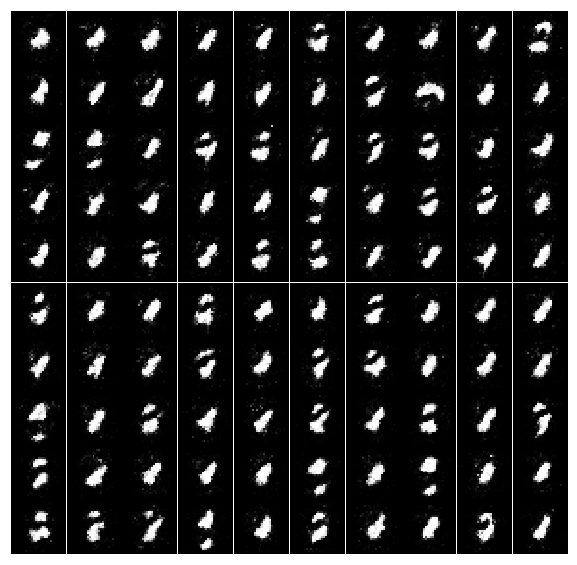

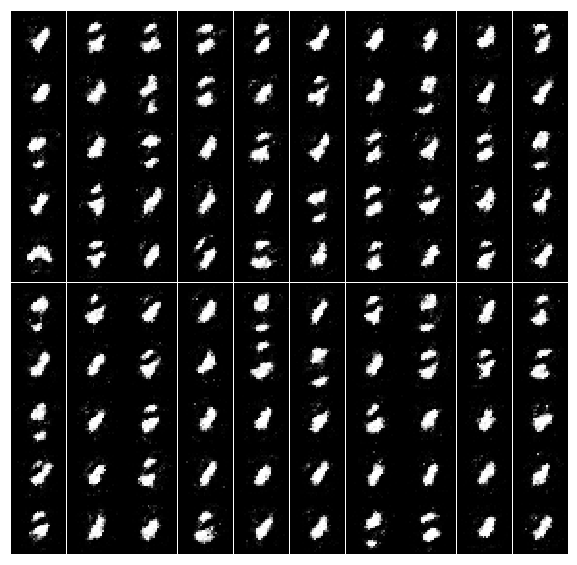

In [27]:
reshaped_images = np.reshape(model.generate_images(number_of_images=100, n_step=1000), (-1, 28, 28))
# for image in reshaped_images:
#     plt.imshow(image, cmap='gray')
#     plt.show()
f, axarr = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i, j].imshow(reshaped_images[i*10 + j], cmap='gray')
        axarr[i, j].axis('off')
        axarr[i, j].set_xticklabels([])
        axarr[i, j].set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('wow.png')
plt.show()

# with sampling in making image

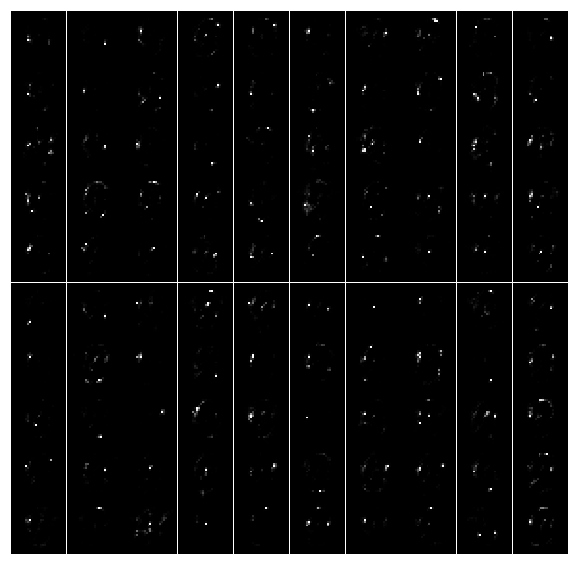

In [10]:
reshaped_images = np.reshape(model.generate_images(number_of_images=100, n_step=1000), (-1, 28, 28))
# for image in reshaped_images:
#     plt.imshow(image, cmap='gray')
#     plt.show()
f, axarr = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i, j].imshow(reshaped_images[i*10 + j], cmap='gray')
        axarr[i, j].axis('off')
        axarr[i, j].set_xticklabels([])
        axarr[i, j].set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()